In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from requests import Request, Session
import json
import time
import webbrowser
import pprint

def getInfo (): # Function to get the info

    url = 'https://pro-api.coinmarketcap.com/v2/cryptocurrency/quotes/latest' # Coinmarketcap API url

    parameters = { 'slug': 'bitcoin', 'convert': 'USD' } # API parameters to pass in for retrieving specific cryptocurrency data

    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '4b006a8e-e926-4df8-99c7-24bd93ce605a'
    } # Replace 'YOUR_API_KEY' with the API key you have recieved in the previous step

    session = Session()
    session.headers.update(headers)

    response = session.get(url, params=parameters)

    info = json.loads(response.text)

    pprint.pprint(info)
        
getInfo() # Calling the function to get the statistics

{'data': {'1': {'circulating_supply': 18997168,
                'cmc_rank': 1,
                'date_added': '2013-04-28T00:00:00.000Z',
                'id': 1,
                'is_active': 1,
                'is_fiat': 0,
                'last_updated': '2022-03-29T12:26:00.000Z',
                'max_supply': 21000000,
                'name': 'Bitcoin',
                'num_market_pairs': 9282,
                'platform': None,
                'quote': {'USD': {'fully_diluted_market_cap': 1007017504552.76,
                                  'last_updated': '2022-03-29T12:26:00.000Z',
                                  'market_cap': 910975272044.261,
                                  'market_cap_dominance': 41.9157,
                                  'percent_change_1h': 0.62200131,
                                  'percent_change_24h': 1.53932472,
                                  'percent_change_30d': 21.38807141,
                                  'percent_change_60d': 31.91502261,
 

In [10]:
BTC_Ticker = yf.Ticker("BTC-USD")
BTC_Data = BTC_Ticker.history(period="max")

In [51]:
close_price_bitcoin = BTC_Data["Close"].to_numpy()
close_price_bitcoin_nohead = close_price_bitcoin[1:]
close_price_bitcoin_notail = close_price_bitcoin[:len(close_price_bitcoin) - 1]

bitcoin_volatility = (close_price_bitcoin_nohead/close_price_bitcoin_notail - 1)
bitcoin_std = np.std(bitcoin_volatility)*np.sqrt(365)

bitcoin_ror = ((close_price_bitcoin_nohead - close_price_bitcoin_notail)/close_price_bitcoin_notail)
expected_return_bitcoin = np.mean(bitcoin_ror)*365

In [52]:
one_ticker = yf.Ticker("ONE1-USD")
one_data = one_ticker.history(period="max")

In [68]:
close_price_one = one_data["Close"].to_numpy()
close_price_one_nohead = close_price_one[1:]
close_price_one_notail = close_price_one[:len(close_price_one) - 1]
one_volatility = (close_price_one_nohead/close_price_one_notail - 1)
one_std = np.std(one_volatility)*np.sqrt(365)
one_ror = ((close_price_one_nohead - close_price_one_notail)/close_price_one_notail)
expected_return_one = np.mean(one_ror)*365

In [136]:
risk_free_rate_harmony = 0.05
corr_one_btc = one_data["Close"].corr(BTC_Data["Close"])

In [137]:
one_std

1.7284810619599917

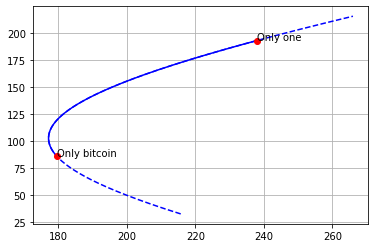

In [138]:
#efficient frontier
weight = np.linspace(start=0, stop=1, num=1000)
portofolio_returns = weight * expected_return_one + (1 - weight) * expected_return_bitcoin
portofolio_std = np.sqrt(weight**2*one_std**2+(1-weight)**2*bitcoin_std**2+2*corr_one_btc*one_std**2*bitcoin_std**2)

#inefficient portofolios
weight_inefficient = np.linspace(start=-0.5, stop=1.21, num=1000)
portofolio_returns_inefficient = weight_inefficient * expected_return_one + (1 - weight_inefficient) * expected_return_bitcoin
portofolio_std_inefficient = np.sqrt(weight_inefficient**2*one_std**2+(1-weight_inefficient)**2*bitcoin_std**2+2*corr_one_btc*one_std**2*bitcoin_std**2)

plt.plot(portofolio_std*100, portofolio_returns*100, linestyle='-', c='blue')
plt.plot(portofolio_std_inefficient*100, portofolio_returns_inefficient*100, linestyle='--', c='blue')

plt.annotate('Only one', (portofolio_std[-1]*100, portofolio_returns[-1]*100), xytext=(portofolio_std[-1]*100, portofolio_returns[-1]*100))
plt.annotate('Only bitcoin', (portofolio_std[0]*100, portofolio_returns[0]*100), xytext=(portofolio_std[0]*100, portofolio_returns[0]*100))
plt.plot([portofolio_std[-1]*100,portofolio_std[0]*100], [portofolio_returns[-1]*100,portofolio_returns[0]*100], 'ro')

plt.grid(True)

In [139]:
SR = (portofolio_returns-risk_free_rate_harmony)/portofolio_std
optimal_SR = SR.max()
index_tan= np.argmax(SR)
x= np.linspace(start=0, stop=3, num=1000)
y = risk_free_rate_harmony + optimal_SR * x

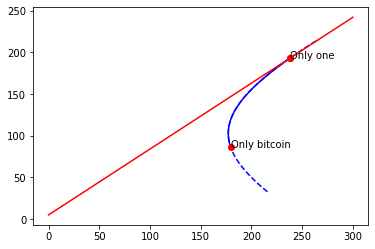

In [140]:
plt.plot(portofolio_std*100, portofolio_returns*100, linestyle='-', c='blue')
plt.plot(portofolio_std_inefficient*100, portofolio_returns_inefficient*100, linestyle='--', c='blue')
plt.plot(x*100, y*100, '-r', label='CML')

plt.annotate('Only one', (portofolio_std[-1]*100, portofolio_returns[-1]*100), xytext=(portofolio_std[-1]*100, portofolio_returns[-1]*100))
plt.annotate('Only bitcoin', (portofolio_std[0]*100, portofolio_returns[0]*100), xytext=(portofolio_std[0]*100, portofolio_returns[0]*100))
plt.plot([portofolio_std[-1]*100,portofolio_std[0]*100,portofolio_std[index_tan]*100], [portofolio_returns[-1]*100,portofolio_returns[0]*100,portofolio_returns[index_tan]*100], 'ro')

In [15]:
luna_ticker = yf.Ticker("LUNA1-USD")
luna_data = luna_ticker.history(period="max")

In [16]:
luna_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-07-26,1.704222,1.833167,1.261695,1.327436,12088575,0,0
2019-07-27,1.327436,1.402898,1.221938,1.310566,6033446,0,0
2019-07-28,1.310566,1.368595,1.236858,1.272989,1643709,0,0
2019-07-29,1.262270,1.375941,1.175443,1.294661,3966802,0,0
2019-07-30,1.294435,1.374333,1.266484,1.294193,1820705,0,0
...,...,...,...,...,...,...,...
2022-03-27,91.383545,94.392365,89.804741,94.151543,1014543759,0,0
2022-03-28,94.154274,101.513031,93.032532,97.328468,2840626725,0,0
2022-03-29,97.274864,109.655182,97.225067,108.988426,4234627174,0,0


In [61]:
data = pd.read_csv("archive/all_currencies.csv")

In [62]:
data

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN
...,...,...,...,...,...,...,...,...,...
632213,298,2018-09-23,ZZC,0.067149,0.067324,0.024069,0.024161,34.0,130705.0
632214,299,2018-09-24,ZZC,0.024167,0.091875,0.024121,0.091631,58.0,47041.0
632215,300,2018-09-25,ZZC,0.091528,0.091568,0.057507,0.090547,752.0,178158.0
632216,301,2018-09-26,ZZC,0.090400,0.104745,0.086071,0.086559,60.0,175963.0


In [103]:
data = pd.read_csv("archive/coin-dance-market-cap-historical.csv")

In [105]:
data["Total Market Cap"] = data["Altcoin Market Cap"] + data["Bitcoin Market Cap"]
data["Bitcoin dominance"] = data["Bitcoin Market Cap"] / data["Total Market Cap"]
data["Label"] = pd.to_datetime(data["Label"])
data = data.rename(columns = {"Label":"date"})
data = data.set_index("date")

<AxesSubplot:xlabel='date'>

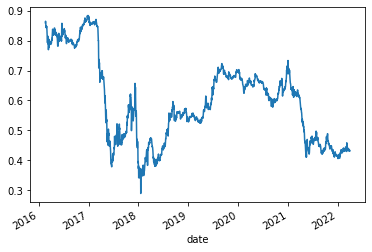

In [106]:
data["Bitcoin dominance"].plot()

In [129]:
data_defi_tvl = pd.read_json("archive/tvl_defi.json")
data_defi_tvl = data_defi_tvl.set_index("date")

<AxesSubplot:xlabel='date'>

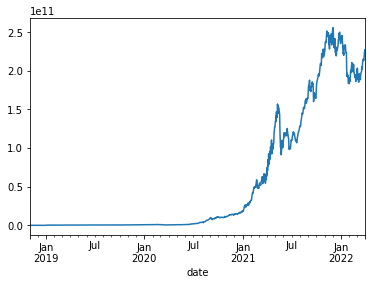

In [130]:
data_defi_tvl["totalLiquidityUSD"].plot()

In [131]:
data_defi_tvl

,totalLiquidityUSD
date,
2018-11-03,3.468404e+04
2018-11-04,4.129299e+04
2018-11-05,4.155031e+04
2018-11-06,4.323356e+04
2018-11-07,1.538626e+05
...,...
2022-03-27,2.152452e+11
2022-03-28,2.202515e+11
2022-03-29,2.235936e+11


In [132]:
data_defi_tvl = data_defi_tvl.reset_index()
data_defi_tvl_after_2020 = data_defi_tvl[~(data_defi_tvl["date"] < "01-01-2020")]
data = data.reset_index()
data = data[~(data["date"] < "01-01-2020")]
data_merged = data.merge(data_defi_tvl_after_2020,on="date")

In [133]:
data_merged

,level_0,index,date,Altcoin Market Cap,Bitcoin Market Cap,Total Market Cap,Bitcoin dominance,totalLiquidityUSD
0,1406,1406,2020-01-01,5.667107e+10,1.292066e+11,1.858777e+11,0.695116,6.016475e+08
1,1407,1407,2020-01-02,5.699524e+10,1.312784e+11,1.882736e+11,0.697274,6.010804e+08
2,1408,1408,2020-01-03,5.878638e+10,1.339422e+11,1.927285e+11,0.694978,5.957017e+08
3,1409,1409,2020-01-04,5.967300e+10,1.361438e+11,1.958168e+11,0.695261,6.036544e+08
4,1410,1410,2020-01-05,6.085407e+10,1.370296e+11,1.978837e+11,0.692476,6.056446e+08
...,...,...,...,...,...,...,...,...
816,2222,2222,2022-03-27,1.158066e+12,8.927819e+11,2.050847e+12,0.435323,2.152452e+11
817,2223,2223,2022-03-28,1.178796e+12,9.045059e+11,2.083302e+12,0.434169,2.202515e+11
818,2224,2224,2022-03-29,1.178873e+12,9.027278e+11,2.081600e+12,0.433670,2.235936e+11
819,2225,2225,2022-03-30,1.187686e+12,8.944377e+11,2.082123e+12,0.429580,2.270445e+11


<AxesSubplot:>

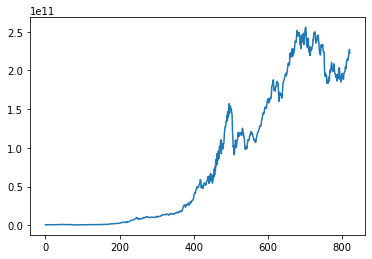

In [139]:
data_merged["totalLiquidityUSD"].plot()



<AxesSubplot:>

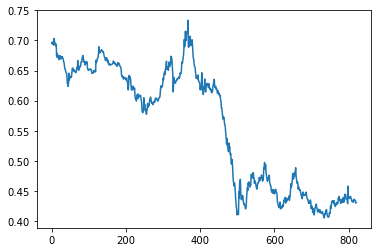

In [138]:
data_merged["Bitcoin dominance"].plot()

In [20]:
data = pd.read_csv("archive/coin-dance-market-cap-historical.csv")

C:\Users\hugol\AppData\Local\Temp\ipykernel_13800\95801892.py:1: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,

In [21]:
data

,Unnamed: 0,Category,Chain,Category.1,Token,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1240,Unnamed: 1241,Unnamed: 1242,Unnamed: 1243,Unnamed: 1244,Unnamed: 1245,Unnamed: 1246,Unnamed: 1247,Unnamed: 1248,Unnamed: 1249
0,Date,NaN,NaN,NaN,NaN,03/11/2018,04/11/2018,05/11/2018,06/11/2018,07/11/2018,...,22/03/2022,23/03/2022,24/03/2022,25/03/2022,26/03/2022,27/03/2022,28/03/2022,29/03/2022,30/03/2022,31/03/2022
1,Timestamp,NaN,NaN,NaN,NaN,1541203200,1541289600,1541376000,1541462400,1541548800,...,1647907200,1647993600,1648080000,1648166400,1648252800,1648339200,1648425600,1648512000,1648598400,1648684800
2,WBTC,Bridge,Total,TVL,NaN,NaN,NaN,NaN,NaN,NaN,...,11229670252.080002,11597228501.04,11749557328.920002,12048589929.919998,12118518699.769999,12244390485.499998,12804643335.71,12948614332.46,12932708965.199999,12955744324.679998
3,WBTC,Bridge,ethereum,TVL,NaN,NaN,NaN,NaN,NaN,NaN,...,11229670252.080002,11597228501.04,11749557328.920002,12048589929.919998,12118518699.769999,12244390485.499998,12804643335.71,12948614332.46,12932708965.199999,12955744324.679998
4,Yearn Finance,Yield Aggregator,ethereum,TVL,NaN,NaN,NaN,NaN,NaN,NaN,...,2762573308.752606,2768205594.6414766,2777454741.395997,2747134736.9217725,2694997692.9484277,2709075126.9842644,2763568216.419677,2777081101.5291276,2791705151.909911,2776455100.7137628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168579,SushiSwap,Dexes,polygon,Tokens,EWT,NaN,NaN,NaN,NaN,NaN,...,261.6012,285.1978,265.9867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168580,SushiSwap,Dexes,polygon,Tokens,STG,NaN,NaN,NaN,NaN,NaN,...,880373.266643,768733.998223,662593.537564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168581,SushiSwap,Dexes,polygon,Tokens,QWLA,NaN,NaN,NaN,NaN,NaN,...,306.562073,296.134265,293.62747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168582,SushiSwap,Dexes,polygon,Tokens,EGX,NaN,NaN,NaN,NaN,NaN,...,7502.0,10254.0,10254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data["Token"] = data["Token"].dropna()

In [25]:
data

,Unnamed: 0,Category,Chain,Category.1,Token,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1240,Unnamed: 1241,Unnamed: 1242,Unnamed: 1243,Unnamed: 1244,Unnamed: 1245,Unnamed: 1246,Unnamed: 1247,Unnamed: 1248,Unnamed: 1249
0,Date,NaN,NaN,NaN,NaN,03/11/2018,04/11/2018,05/11/2018,06/11/2018,07/11/2018,...,22/03/2022,23/03/2022,24/03/2022,25/03/2022,26/03/2022,27/03/2022,28/03/2022,29/03/2022,30/03/2022,31/03/2022
1,Timestamp,NaN,NaN,NaN,NaN,1541203200,1541289600,1541376000,1541462400,1541548800,...,1647907200,1647993600,1648080000,1648166400,1648252800,1648339200,1648425600,1648512000,1648598400,1648684800
2,WBTC,Bridge,Total,TVL,NaN,NaN,NaN,NaN,NaN,NaN,...,11229670252.080002,11597228501.04,11749557328.920002,12048589929.919998,12118518699.769999,12244390485.499998,12804643335.71,12948614332.46,12932708965.199999,12955744324.679998
3,WBTC,Bridge,ethereum,TVL,NaN,NaN,NaN,NaN,NaN,NaN,...,11229670252.080002,11597228501.04,11749557328.920002,12048589929.919998,12118518699.769999,12244390485.499998,12804643335.71,12948614332.46,12932708965.199999,12955744324.679998
4,Yearn Finance,Yield Aggregator,ethereum,TVL,NaN,NaN,NaN,NaN,NaN,NaN,...,2762573308.752606,2768205594.6414766,2777454741.395997,2747134736.9217725,2694997692.9484277,2709075126.9842644,2763568216.419677,2777081101.5291276,2791705151.909911,2776455100.7137628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168579,SushiSwap,Dexes,polygon,Tokens,EWT,NaN,NaN,NaN,NaN,NaN,...,261.6012,285.1978,265.9867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168580,SushiSwap,Dexes,polygon,Tokens,STG,NaN,NaN,NaN,NaN,NaN,...,880373.266643,768733.998223,662593.537564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168581,SushiSwap,Dexes,polygon,Tokens,QWLA,NaN,NaN,NaN,NaN,NaN,...,306.562073,296.134265,293.62747,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168582,SushiSwap,Dexes,polygon,Tokens,EGX,NaN,NaN,NaN,NaN,NaN,...,7502.0,10254.0,10254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
data["Category_Tokens"] = data[(data["Category.1"] == "Tokens") | (data["Category.1"] == "Tokens(USD)")]

ValueError: Expected a 1D array, got an array with shape (168584, 1250)

In [39]:
data.columns

Index(['Unnamed: 0', 'Category', 'Chain', 'Category.1', 'Token', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 1240', 'Unnamed: 1241', 'Unnamed: 1242', 'Unnamed: 1243',
       'Unnamed: 1244', 'Unnamed: 1245', 'Unnamed: 1246', 'Unnamed: 1247',
       'Unnamed: 1248', 'Unnamed: 1249'],
      dtype='object', length=1250)